Agricultural products are the backbone of many economies, and understanding their sales data can provide valuable insights into market trends, supply chain efficiency, and consumer preferences. In this notebook, we will explore the Agricultural Products Sales Data for the years 2022-2023. If you find this notebook useful, please consider upvoting it.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
file_path = '/kaggle/input/agricultural-products-sales-data-2022-2023/AgricultureData.csv'
df = pd.read_csv(file_path)

### Initial Data Exploration

In [4]:
# Display the first few rows of the dataset
df.head()

,product_id,product_name,category,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,supplier,farm_location,sale_date
0,b12c721e-8301-4b08-8ac3-d435be9b8b32,Lamb,Livestock,14.10,19224,14905,4319,Organic Meats Co.,"O'Reillyboro, OR",2022-07-04
1,4a0f8862-c851-4073-bc17-3a3d93834902,Beef,Livestock,11.37,29504,4550,24954,Organic Meats Co.,"Lake Nora, AR",2023-10-21
2,be996df6-1780-4352-8b7d-1f927279aa49,Oranges,Fruits,2.59,1838,1722,116,Berry Fields,"East Friedaside, NM",2023-12-24
3,6c8adfc3-2114-4b78-a3e2-2269a6a0dc02,Milk,Dairy,1.34,6750,1232,5518,Fresh Dairy Farms,"East Javon, FL",2023-12-25
4,0bd5bf2b-be0a-4ba0-aa92-059021b169e3,Bananas,Fruits,1.78,48729,47020,1709,Golden Orchards,"Lake D'angelo, MN",2023-06-20


### Data Preprocessing

In [5]:
# Convert sale_date to datetime format
df['sale_date'] = pd.to_datetime(df['sale_date'])

### Exploratory Data Analysis (EDA)

In [6]:
# Summary statistics
df.describe()

,price_per_kg,units_shipped_kg,units_sold_kg,units_on_hand_kg,sale_date
count,8893.000000,8893.000000,8893.000000,8893.000000,8893
mean,3.641478,25471.785562,12545.278421,12926.507140,2022-12-30 08:49:00.559990784
min,0.400000,1005.000000,0.000000,0.000000,2022-01-01 00:00:00
25%,0.970000,13228.000000,3642.000000,3890.000000,2022-06-27 00:00:00
50%,2.680000,25468.000000,9643.000000,9805.000000,2022-12-31 00:00:00
75%,5.300000,37964.000000,18832.000000,19622.000000,2023-07-03 00:00:00
max,14.390000,50000.000000,49726.000000,49818.000000,2023-12-31 00:00:00
std,3.306348,14177.334372,10772.529049,10996.124845,NaN


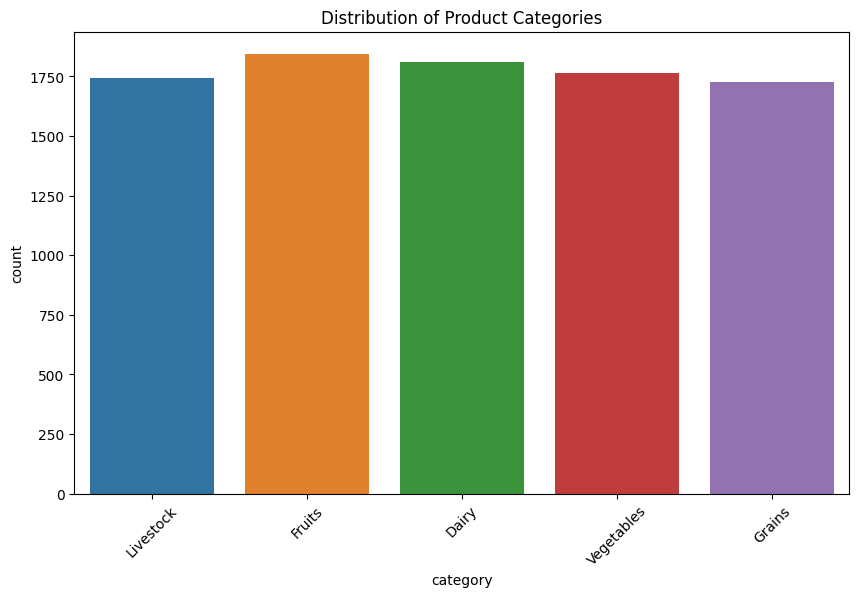

In [7]:
# Distribution of product categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.show()

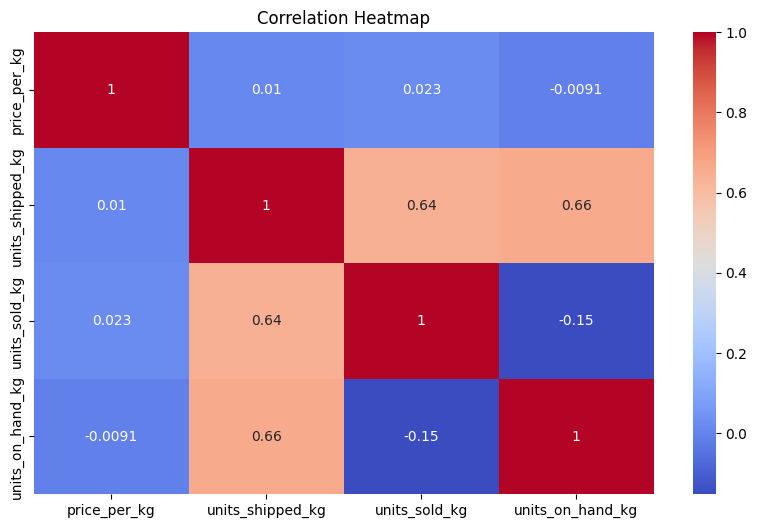

In [8]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Predictive Analysis
Given the data, it might be interesting to predict the units sold based on other features. Let's build a simple linear regression model to predict `units_sold_kg`.

In [9]:
# Define features and target variable
X = numeric_df.drop(columns=['units_sold_kg'])
y = numeric_df['units_sold_kg']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.7680190059690113e-22
R-squared: 1.0


### Future Analysis
There are several avenues for future analysis:
- Investigate the impact of different suppliers on sales.
- Analyze seasonal trends in sales data.
- Explore the relationship between farm location and product pricing.

What do you think would be useful to explore next?

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)